In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
from twitter.twitter_collection import TwitterCollection
from twitter.tweet_sentiment_analyzer import TweetSentimentAnalyzer
from data_pipelines.data_manipulation import DataManipulation
from dl_models.xgboost_forecaster import XgboostForecaster
from logger.logger import Logger


import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

In [17]:
SYMBOL = 'BTC-USD'
SYMBOL_NAME = 'Bitcoin'
SYMBOL_CUT = 'btc'
scale = 1
range_list = [i for i in range(5,21)]
range_list = [i*scale for i in range_list]
interval = '1h'
start_date = '2022-12-15'
end_date = '2022-12-25'
source = 'yahoo'
LOG_PATH = '../logger' + os.sep + "logs"
LOG_FILE_NAME_PREFIX = f"log_{SYMBOL_CUT}_{start_date}_{end_date}"

logger = Logger(LOG_PATH, LOG_FILE_NAME_PREFIX)
tsa = TweetSentimentAnalyzer()
data = DataManipulation(SYMBOL, source, range_list, start_date=start_date, 
                        end_date=end_date, interval=interval, scale=scale, 
                        prefix_path='..', saved_to_csv=True,
                        logger=logger)
df_price = data.df.copy()

1 ) 25-12-2022 02_46_04 MainThread INFO\ Initialized logging at path ../logger/logs/log_btc_2022-12-15_2022-12-25_25-12-2022_02_46_04.log
[*********************100%***********************]  1 of 1 completed
2 ) 25-12-2022 02_46_06 MainThread DEBUG\ Get BTC-USD data from yahoo start date: 2022-12-15 and 2022-12-25 also interval: 1h
3 ) 25-12-2022 02_46_06 MainThread DEBUG\ Write pure data file to ../data/pure_data/BTC-USDBTC-USD_2022-12-15_2022-12-25_1h.csv
Start TA-LIB module
4 ) 25-12-2022 02_46_06 MainThread DEBUG\ Calculated SMA for range [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
5 ) 25-12-2022 02_46_06 MainThread DEBUG\ Calculated BOLLINGERBAND for range [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
6 ) 25-12-2022 02_46_06 MainThread DEBUG\ Calculated DEMA for range [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
7 ) 25-12-2022 02_46_06 MainThread DEBUG\ Calculated EMA for range [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [18]:
df_price_ext = data.extract_features()
#close_col = df_price.loc['2021-01-01':'2022-06-27',['close','volume']].copy()

30 ) 25-12-2022 02_46_55 MainThread DEBUG\ Start helper function for Hisse strategy
31 ) 25-12-2022 02_46_55 MainThread DEBUG\ Hisse strategy, mfi and fischer scoring is finished
32 ) 25-12-2022 02_46_55 MainThread DEBUG\ Start ema normalized label


100%|██████████| 16/16 [00:00<00:00, 546.94it/s]


33 ) 25-12-2022 02_46_55 MainThread DEBUG\ Add ema normalized label
34 ) 25-12-2022 02_46_55 MainThread DEBUG\ Start mfi normalized label


100%|██████████| 16/16 [00:00<00:00, 902.04it/s]


35 ) 25-12-2022 02_46_55 MainThread DEBUG\ Add mfi normalized label
36 ) 25-12-2022 02_46_55 MainThread DEBUG\ Start sma normalized label


100%|██████████| 16/16 [00:00<00:00, 459.02it/s]


37 ) 25-12-2022 02_46_55 MainThread DEBUG\ Add sma normalized label
38 ) 25-12-2022 02_46_55 MainThread DEBUG\ Start wma normalized label


100%|██████████| 16/16 [00:00<00:00, 414.18it/s]


39 ) 25-12-2022 02_46_55 MainThread DEBUG\ Add wma normalized label
40 ) 25-12-2022 02_46_55 MainThread DEBUG\ Start tema normalized label


100%|██████████| 16/16 [00:00<00:00, 25.46it/s]


41 ) 25-12-2022 02_46_56 MainThread DEBUG\ Add tema normalized label
42 ) 25-12-2022 02_46_56 MainThread DEBUG\ Start kama normalized label


100%|██████████| 16/16 [00:00<00:00, 27.06it/s]


43 ) 25-12-2022 02_46_56 MainThread DEBUG\ Add kama normalized label
44 ) 25-12-2022 02_46_56 MainThread DEBUG\ Start rsi normalized label


100%|██████████| 16/16 [00:00<00:00, 40.06it/s]


45 ) 25-12-2022 02_46_57 MainThread DEBUG\ Add rsi normalized label
46 ) 25-12-2022 02_46_57 MainThread DEBUG\ Add ADX indicator normalized label
47 ) 25-12-2022 02_46_57 MainThread DEBUG\ Normalized features for indicators values to 1 and 0
48 ) 25-12-2022 02_46_57 MainThread DEBUG\ Add Datetime fetures for extracted feature data
49 ) 25-12-2022 02_46_59 MainThread DEBUG\ Lags for features and log return vol_delta with binary label
50 ) 25-12-2022 02_46_59 MainThread DEBUG\ Add KZ score and Index label
logs written...


In [25]:
#sent_tweets = pd.read_csv('btc_archieve/btc_hourly_sent_score.csv')
sent_tweets = pd.read_csv('../data/tweets_data/btc/btc_hour.csv')
sent_tweets.Datetime = pd.to_datetime(sent_tweets.Datetime)
sent_tweets.set_index('Datetime', inplace=True, drop=True)

In [21]:
sent_tweets.index = sent_tweets.index.tz_convert(None)

In [24]:
df_price_ext.head()

,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,lag_52,lag_53,lag_54,lag_55,lag_56,lag_57,lag_58,lag_59,feature_label,kz_score
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-12-19 15:00:00+00:00,0,0,0,0,0,0,1,0,2,2,...,0,1,1,0,1,1,0,1,0.0000,0.9871
2022-12-19 16:00:00+00:00,0,0,0,0,0,0,1,0,1,2,...,1,1,0,1,1,0,1,1,0.0000,1.0224
2022-12-19 17:00:00+00:00,0,0,0,0,0,0,1,0,1,2,...,1,0,1,1,0,1,1,0,0.0000,0.9521
2022-12-19 18:00:00+00:00,0,0,0,0,0,0,1,0,1,2,...,0,1,1,0,1,1,0,0,0.0000,0.9502
2022-12-19 19:00:00+00:00,0,0,0,0,0,0,1,0,1,2,...,1,1,0,1,1,0,0,0,1.0000,0.9614


In [26]:
df_final = tsa.concat_ohlc_compound_score(df_price_ext, sent_tweets)
#df_final = df_final.loc['2021-01-01':,:].copy()
df_final.dropna(inplace=True)

Concantenation for sentiment score tweets and indicator MAtrix data


In [38]:
df_final.shape

(114, 263)

Text(0.5, 1.0, 'Bitcoin Proce')

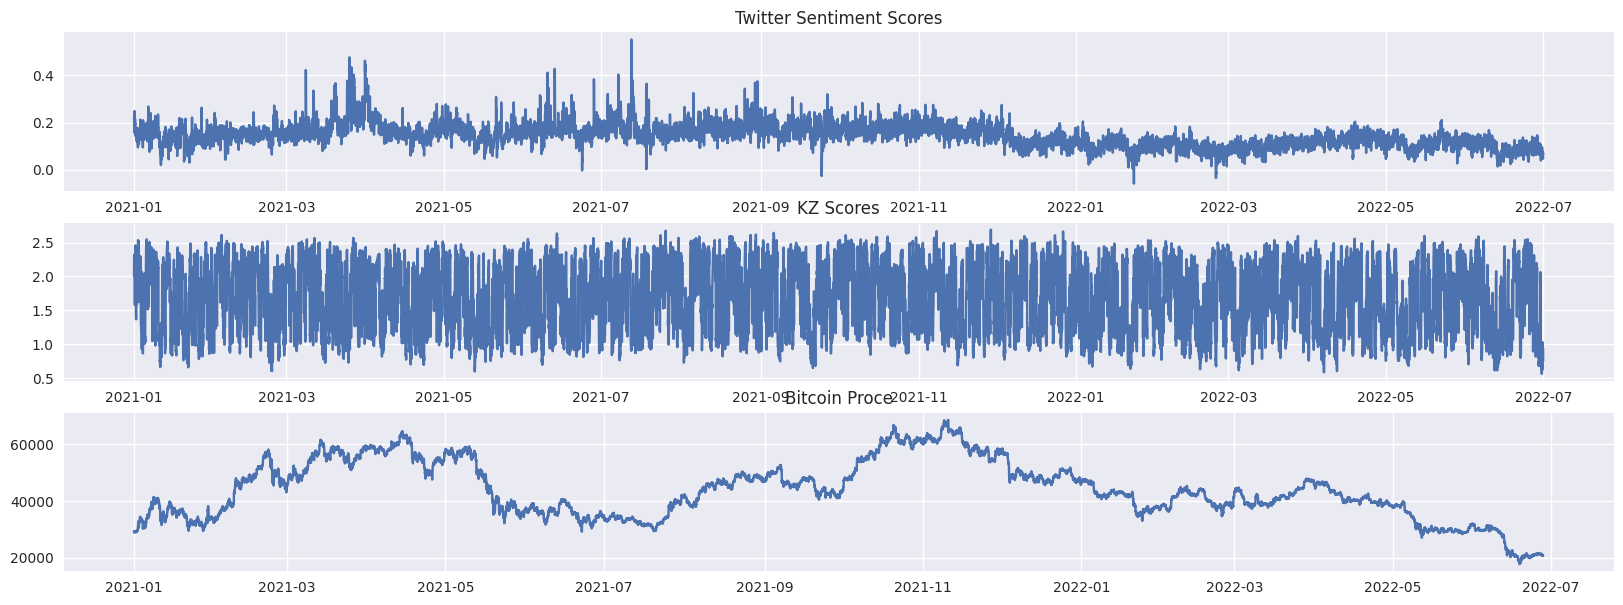

In [8]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(20,7))
ax1.plot(df_final.compound_total)
ax1.set_title('Twitter Sentiment Scores')
ax2.plot(df_final.index, df_final.kz_score)
ax2.set_title('KZ Scores')
ax3.plot(close_col.index, close_col.close)
ax3.set_title('Bitcoin Proce')

In [28]:
df = df_final.copy()
df.reset_index(drop=True, inplace=True)
df.head()

,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,lag_53,lag_54,lag_55,lag_56,lag_57,lag_58,lag_59,feature_label,kz_score,compound_total
0,0,0,0,0,0,0,1,0,2,2,...,1,1,0,1,1,0,1,0.0000,0.9871,0.1197
1,0,0,0,0,0,0,1,0,1,2,...,1,0,1,1,0,1,1,0.0000,1.0224,0.2773
2,0,0,0,0,0,0,1,0,1,2,...,0,1,1,0,1,1,0,0.0000,0.9521,0.0339
3,0,0,0,0,0,0,1,0,1,2,...,1,1,0,1,1,0,0,0.0000,0.9502,0.2600
4,0,0,0,0,0,0,1,0,1,2,...,1,0,1,1,0,0,0,1.0000,0.9614,0.2267


In [29]:
df_price.close.head()

Datetime
2022-12-19 15:00:00+00:00   16688.5410
2022-12-19 16:00:00+00:00   16647.6465
2022-12-19 17:00:00+00:00   16606.0156
2022-12-19 18:00:00+00:00   16581.1562
2022-12-19 19:00:00+00:00   16577.1758
Name: close, dtype: float64

In [30]:
df_final['close'] = df_price.close.copy()

In [31]:
df_final.dropna(inplace=True)

In [36]:
y = df_final.close
X = df_final.drop(columns=['close'], axis=1)


y = df_price.close
X = df_price.drop(columns=['close', 'candlestick_pattern'], axis=1)

In [37]:
ytest = y
ypred_reg = xgb.model.predict(X)
#print(f'Last accuracy: {accuracy_score(ytest, ypred_reg)}')
#print(f'Confusion Matrix: {confusion_matrix(ytest, ypred_reg)}')
x_ax = range(len(xgb.y_test))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred_reg, label="predicted")
plt.title("Prediction versus actual for BTC")
plt.legend()
plt.show()

ValueError: Feature shape mismatch, expected: 262, got 372

Creating X_train, X_test, y_train, y_test, evalset
[0]	validation_0-error:-46264.29858	validation_1-error:-34377.65851
[1]	validation_0-error:-46264.29858	validation_1-error:-34377.65851
[2]	validation_0-error:-46264.29858	validation_1-error:-34377.65851
[3]	validation_0-error:-46264.29858	validation_1-error:-34377.65851
[4]	validation_0-error:-46264.29858	validation_1-error:-34377.65851
[5]	validation_0-error:-46264.29858	validation_1-error:-34377.65851
[6]	validation_0-error:-46264.29858	validation_1-error:-34377.65851
[7]	validation_0-error:-46264.29858	validation_1-error:-34377.65851
[8]	validation_0-error:-46264.29858	validation_1-error:-34377.65851
[9]	validation_0-error:-46264.29858	validation_1-error:-34377.65851
[10]	validation_0-error:-46264.29858	validation_1-error:-34377.65851
[11]	validation_0-error:-46264.29858	validation_1-error:-34377.65851
[12]	validation_0-error:-46264.29858	validation_1-error:-34377.65851
[13]	validation_0-error:-46264.29858	validation_1-error:-34377

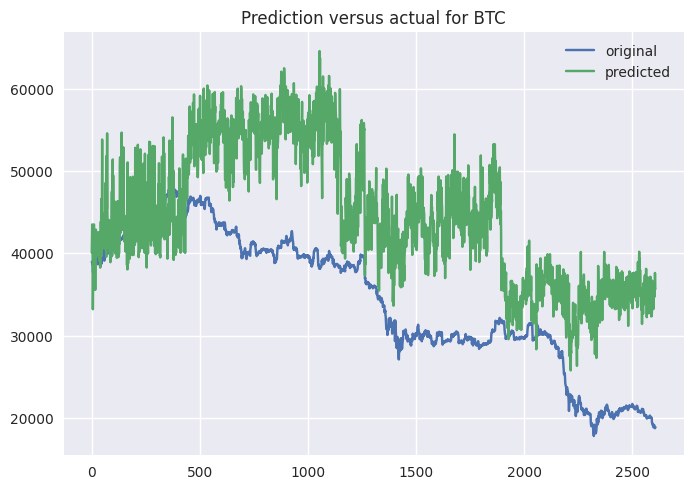

In [14]:
#y = (df_final.log_return > 0).astype(int)                            #df_final.feature_label
#df_final.drop(columns=['feature_label'], axis=1)
from sklearn.metrics import accuracy_score, confusion_matrix

eval_metric = 'logloss'
eval_metric = None
xgb = XgboostForecaster(objective='regression', n_estimators=250, eta=0.3, max_depth=5, 
                    tree_method='gpu_hist', eval_metric='error')
xgb.create_train_test_data(X, y, test_size=0.2)
xgb.fit()
xgb.save_model(f'../dl_models/model_stack/model_price_{interval}_feature_numbers_{X.shape[1]}.json')
score = xgb.get_score()
print(f'first score: {score}')
#xgb.plot_learning_curves()
xgb.get_model_names('../dl_models/model_stack/')
#best_params = xgb.bestparams_gridcv([100, 200], [0.1], [1, 3], verbose=3)


ytest = xgb.y_test
ypred_reg = xgb.model.predict(xgb.X_test)
#print(f'Last accuracy: {accuracy_score(ytest, ypred_reg)}')
#print(f'Confusion Matrix: {confusion_matrix(ytest, ypred_reg)}')
x_ax = range(len(xgb.y_test))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred_reg, label="predicted")
plt.title("Prediction versus actual for BTC")
plt.legend()
plt.show()
#yhat = (xgb.model.predict(xgb.X_test) > 0).astype(int)
#y_ = (xgb.y_test > 0).astype(int)
#accuracy = accuracy_score(yhat, y_)
#print('Accuracy: %.3f' % accuracy)


{'month': 0.2592773, 'compound_total': 0.0397819, 'st_adxdmi_11': 0.032462623, 'st_cut_kama_19_20': 0.024992267, 'st_cut_ema_19_20': 0.01912127, 'st_kama_6': 0.013249436, 'st_cut_kama_11_12': 0.011467039, 'st_fishert': 0.0114323, 'st_adxdmi_20': 0.010753696, 'st_cut_wma_17_18': 0.0098454775}


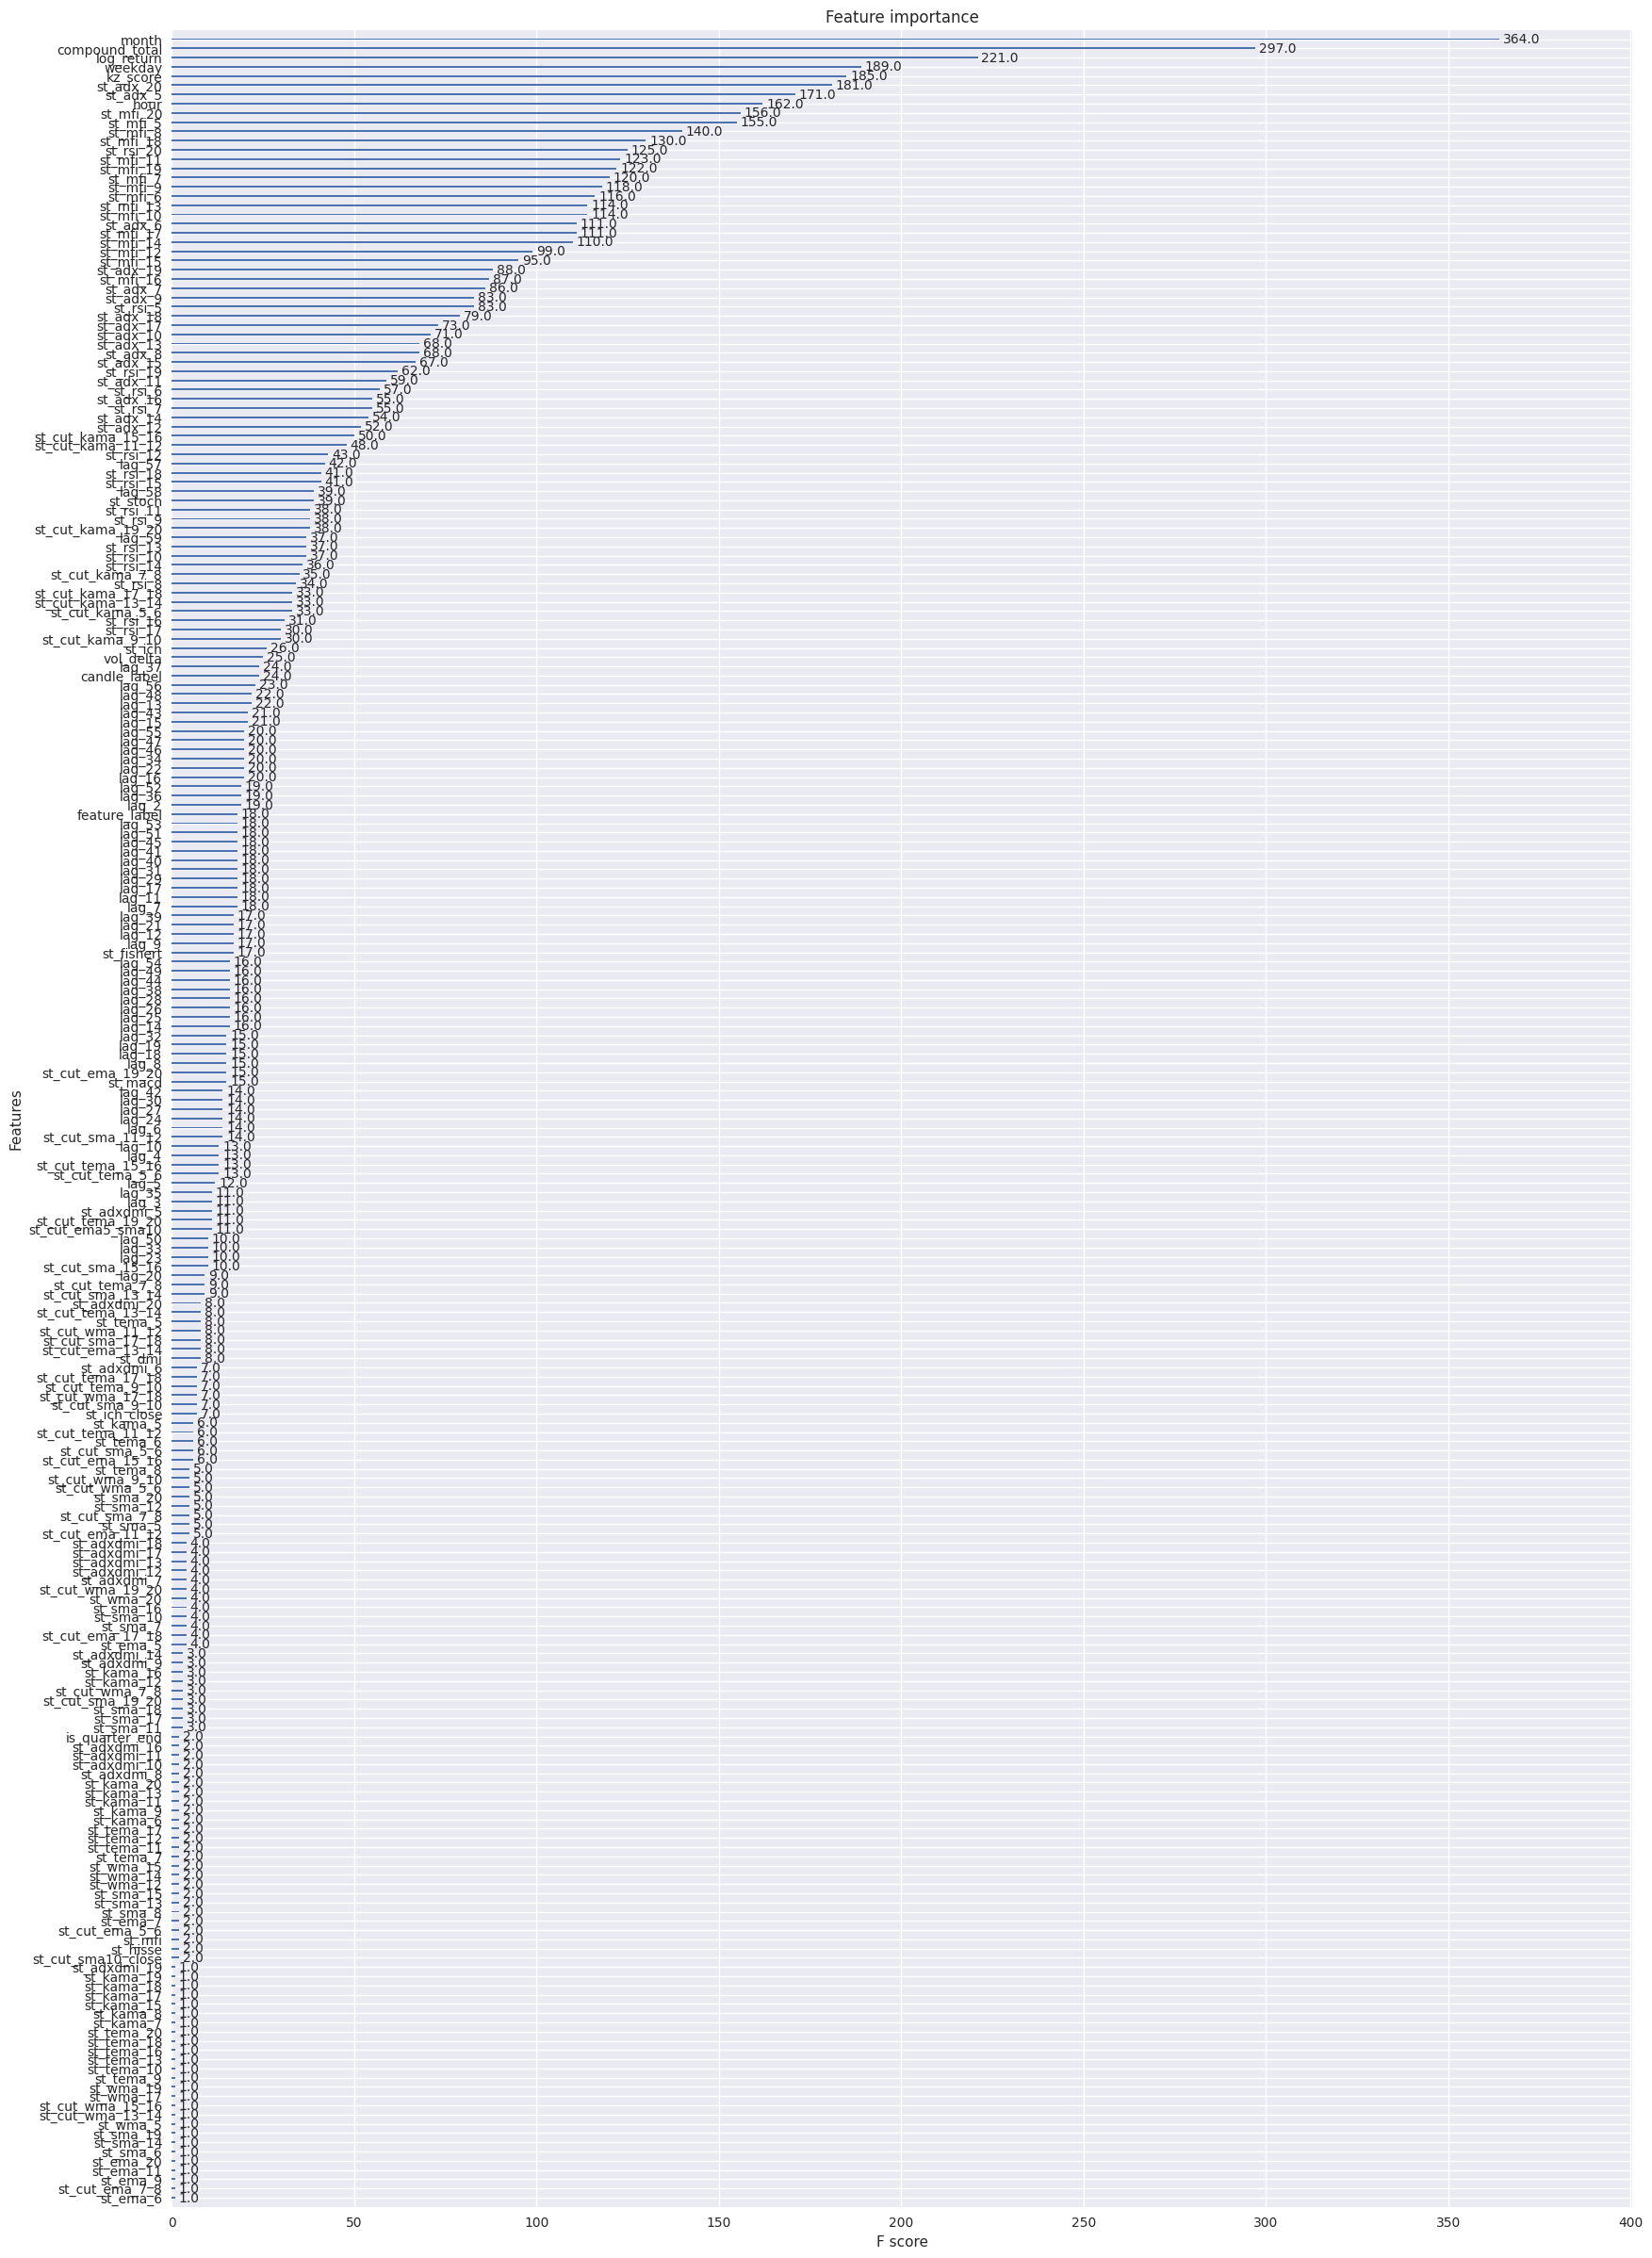

In [15]:
n_feat = xgb.get_n_importance_features(10)
print(n_feat)

xgb.plot_fature_importance()

Learning curves ploting and saved


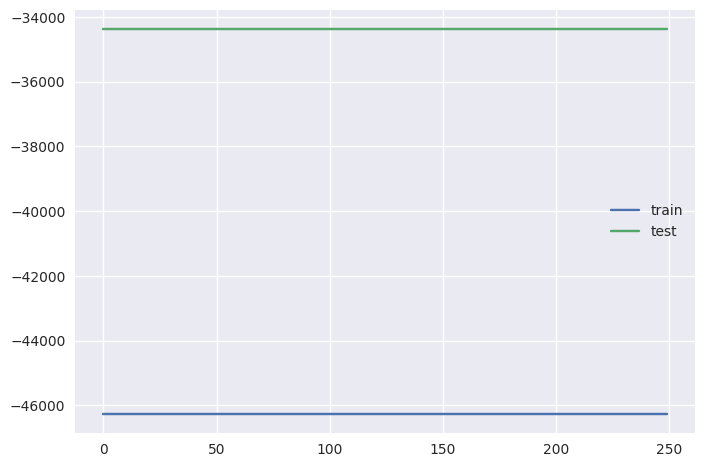

In [16]:
xgb.plot_learning_curves()